In [42]:
# importar bibliotecas e módulos

import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32
import jupyterthemes as jt
import schedule
import time

In [35]:
# puxar dados do yahoo finance

codigos_negociacao = ["^BVSP", "BRL=X"]

data_hoje = datetime.datetime.now()
data_inicio = data_hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(codigos_negociacao, data_inicio, data_hoje)

[*********************100%***********************]  2 of 2 completed


In [36]:
 # idfc about a high or a low, i just want the closureeeeeeeeee
 # manipulação de dados - exclusão e seleção

dados_fechamento = dados_mercado["Adj Close"]

dados_fechamento.columns = ['Dólar', 'Ibovespa']

dados_fechamento = dados_fechamento.dropna()

display(dados_fechamento)

,Dólar,Ibovespa
Date,,
2022-03-30,4.7562,120260.000000
2022-03-31,4.7697,119999.000000
2022-04-01,4.7378,121570.000000
2022-04-04,4.6572,121280.000000
2022-04-05,4.5938,118885.000000
...,...,...
2023-03-23,5.2361,97926.000000
2023-03-24,5.2967,98829.000000
2023-03-27,5.2451,99670.000000


In [37]:
# manipulação - criar tabelas com outros timeframes

dados_anuais = dados_fechamento.resample("y").last()

dados_mensais = dados_fechamento.resample("m").last()

In [38]:
# calcular retorno

retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

In [22]:
# localizar elementos
# loc -> referenciar elementos a partir do nome 
# iloc -> selecionar elementos como uma matriz 
# (negativos = de trás pra frente, positivos começam em 0)

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

In [23]:
# executar somente uma vez

retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2)

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

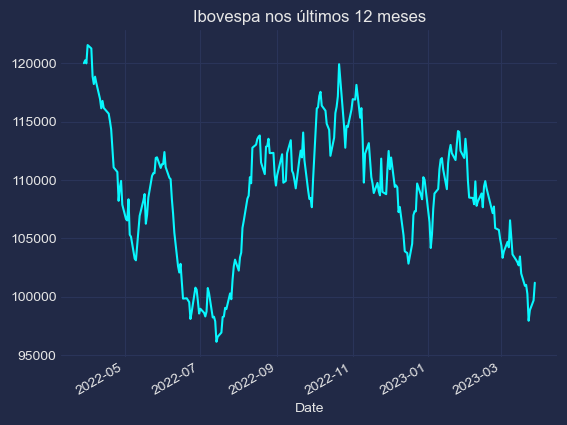

In [24]:
# gráfico performance - Ibovespa

plt.style.use("cyberpunk")

dados_fechamento.plot(y = "Ibovespa", use_index = True, legend = False)

plt.title("Ibovespa nos últimos 12 meses")

plt.savefig('Ibovespa.png', dpi = 300)

plt.show()

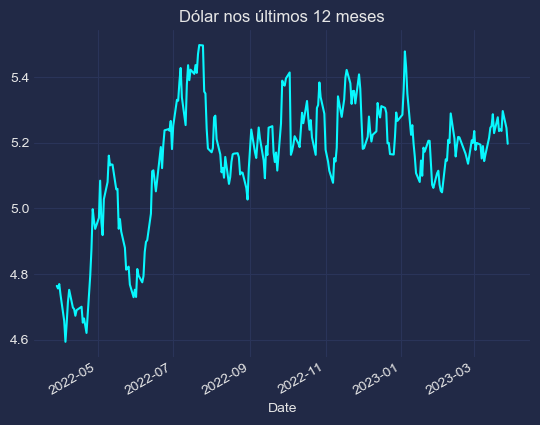

In [25]:
# gráfico performance - Dólar

plt.style.use("cyberpunk")

dados_fechamento.plot(y = "Dólar", use_index = True, legend = False)

plt.title("Dólar nos últimos 12 meses")

plt.savefig('Dólar.png', dpi = 300)

In [31]:
# enviar por e-mail

nome_pessoa = "Jhonatan"

outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [32]:
# texto do e-mail

email.To = "veberjhonatan@gmail.com"
email.Subject = f"Relatório Diário para {nome_pessoa}"
email.Body = f'''Bom dia, {nome_pessoa}, segue o relatório diário:

Bolsa: 

No ano, o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o retorno do Ibovespa foi de {retorno_diario_ibov}%

Dólar: 

No ano, o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%,
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o retorno do Dólar foi de {retorno_diario_dolar}%.

Abraços,

Você mesmo.

'''

anexo_ibovespa = r'C:\Users\PICHAU\Python\Ibovespa.png'
anexo_dolar = r'C:\Users\PICHAU\Python\Dólar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()